# RAPIDS cuML 
## Performance, Boundaries, and Correctness Benchmarks

**Description:** This notebook provides a simple and unified means of benchmarking single GPU cuML algorithms against their skLearn counterparts with the `cuml.benchmark` package in RAPIDS cuML. This enables quick and simple measurements of performance, validation of correctness, and investigation of upper bounds.

Each benchmark returns a Pandas `DataFrame` with the results. At the end of the notebook, these results are used to draw charts and output to a CSV file. 

Please refer to the [table of contents](#table_of_contents) for algorithms available to be benchmarked with this notebook.

In [1]:
import datetime
print(datetime.datetime.now())
import cuml
import pandas as pd

from cuml.benchmark.runners import SpeedupComparisonRunner
from cuml.benchmark.algorithms import algorithm_by_name

import warnings
warnings.filterwarnings('ignore', 'Expected column ')

print(cuml.__version__)

2020-06-07 23:09:29.786858
0.15.0a+386.ga58244da5.dirty


In [2]:
N_REPS = 3  # Number of times each test is repeated

DATA_NEIGHBORHOODS = "blobs"
DATA_CLASSIFICATION = "classification"
DATA_REGRESSION = "regression"

INPUT_TYPE = "numpy"

benchmark_results = []

In [3]:
SSMALL_ROW_SIZES = [2**x for x in range(11, 14)]
SMALL_ROW_SIZES = [2**x for x in range(14, 17)]
LARGE_ROW_SIZES = [2**x for x in range(18, 24, 2)]

SSKINNY_FEATURES = [8, 32]
SKINNY_FEATURES = [32, 256]
WIDE_FEATURES = [1000, 10000]

VERBOSE=True
RUN_CPU=True

In [4]:
def enrich_result(algorithm, runner, result):
    result["algo"] = algorithm
    result["dataset_name"] = runner.dataset_name
    result["input_type"] = runner.input_type
    return result

def execute_benchmark(algorithm, runner, verbose=VERBOSE, run_cpu=RUN_CPU, **kwargs):
    results = runner.run(algorithm_by_name(algorithm), verbose=verbose, run_cpu=run_cpu, **kwargs)
    results = [enrich_result(algorithm, runner, result) for result in results]
    benchmark_results.extend(results)
    
print(datetime.datetime.now())


2020-06-07 23:09:33.041344


## Table of Contents<a id="table_of_contents"/>

### Benchmarks
1. [Neighbors](#neighbors)<br>
    1.1 [Nearest Neighbors - Brute Force](#nn_bruteforce)<br>
    1.2 [KNeighborsClassifier](#kneighborsclassifier)<br>
    1.3 [KNeighborsRegressor](#kneighborsregressor)<br>
2. [Clustering](#clustering)<br>
    2.1 [DBSCAN - Brute Force](#dbscan_bruteforce)<br>
    2.2 [K-Means](#kmeans)<br>
3. [Manifold Learning](#manifold_learning)<br>
    3.1 [UMAP - Unsupervised](#umap_unsupervised)<br>
    3.2 [UMAP - Supervised](#umap_supervised)<br>
    3.3 [T-SNE](#tsne)<br>
4. [Linear Models](#linear_models)<br>
    4.1 [Linear Regression](#linear_regression)<br>
    4.2 [Logistic Regression](#logistic_regression)<br>
    4.3 [Ridge Regression](#ridge_regression)<br>
    4.4 [Lasso Regression](#lasso_regression)<br>
    4.5 [ElasticNet Regression](#elasticnet_regression)<br>
    4.6 [Mini-batch SGD Classifier](#minibatch_sgd_classifier)<br>
5. [Decomposition](#decomposition)<br>
    5.1 [PCA](#pca)<br>
    5.2 [Truncated SVD](#truncated_svd)<br>
6. [Ensemble](#ensemble)<br>
    6.1 [Random Forest Classifier](#random_forest_classifier)<br>
    6.2 [Random Forest Regressor](#random_forest_regressor)<br>
    6.3 [FIL](#fil)<br>
    6.4 [Sparse FIL](#sparse_fil)<br>
7. [Random Projection](#random_projection)<br>
    7.1 [Gaussian Random Projection](#gaussian_random_projection)<br>
    7.2 [Sparse Random Projection](#sparse_random_projection)<br>
8. [SVM](#svm)<br>
    8.1 [SVC - Linear Kernel](#svc_linear_kernel)<br>
    8.2 [SVC - RBF Kernel](#svc_rbf_kernel)<br>
    8.3 [SVR - Linear Kernel](#svr_linear_kernel)<br>
    8.4 [SVR - RBF Kernel](#svr_rbf_kernel)<br>
    
### Chart & Store Results
9. [Convert to Pandas DataFrame](#convert_to_pandas)<br>
10. [Chart Results](#chart_results)<br>
11. [Output to CSV](#output_csv)<br>

## Neighbors<a id="neighbors"/>


### Nearest Neighbors - Brute Force<a id="nn_bruteforce"/>

In [5]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS,
)

execute_benchmark("NearestNeighbors", runner)
print(datetime.datetime.now())


NearestNeighbors (n_samples=16384, n_features=32) [cpu=8.411670684814453, gpu=0.19838404655456543, speedup=42.40094317513998]
NearestNeighbors (n_samples=16384, n_features=256) [cpu=11.560090780258179, gpu=0.20675015449523926, speedup=55.913335631990385]
NearestNeighbors (n_samples=32768, n_features=32) [cpu=29.600563526153564, gpu=0.37178516387939453, speedup=79.61738767971886]
NearestNeighbors (n_samples=32768, n_features=256) [cpu=39.98840641975403, gpu=0.38399457931518555, speedup=104.13794510086366]
NearestNeighbors (n_samples=65536, n_features=32) [cpu=129.5558421611786, gpu=0.7728381156921387, speedup=167.63645520401244]
NearestNeighbors (n_samples=65536, n_features=256) [cpu=140.5281355381012, gpu=0.8484342098236084, speedup=165.6323306050063]
2020-06-07 23:27:53.673455


### KNeighborsClassifier<a id="kneighborsclassifier"/>

In [6]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("KNeighborsClassifier", runner)
print(datetime.datetime.now())


KNeighborsClassifier (n_samples=16384, n_features=32) [cpu=0.03699493408203125, gpu=0.0008246898651123047, speedup=44.85920786354438]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=16384, n_features=256) [cpu=0.38063478469848633, gpu=0.002939462661743164, speedup=129.49128072025306]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=32768, n_features=32) [cpu=0.08533287048339844, gpu=0.001065969467163086, speedup=80.05188995750392]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=32768, n_features=256) [cpu=0.9244289398193359, gpu=0.0053446292877197266, speedup=172.9640897533122]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=65536, n_features=32) [cpu=0.21630644798278809, gpu=0.0016965866088867188, speedup=127.4950815064643]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


KNeighborsClassifier (n_samples=65536, n_features=256) [cpu=2.1808950901031494, gpu=0.00995635986328125, speedup=219.04542624521073]
2020-06-07 23:28:06.471181


### KNeighborsRegressor<a id="kneighborsregressor"/>

In [7]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("KNeighborsRegressor", runner)
print(datetime.datetime.now())


KNeighborsRegressor (n_samples=16384, n_features=32) [cpu=0.03651618957519531, gpu=0.0008208751678466797, speedup=44.48446122567528]
KNeighborsRegressor (n_samples=16384, n_features=256) [cpu=0.388411283493042, gpu=0.002918720245361328, speedup=133.07588629308935]
KNeighborsRegressor (n_samples=32768, n_features=32) [cpu=0.08056020736694336, gpu=0.0010144710540771484, speedup=79.41104582843714]
KNeighborsRegressor (n_samples=32768, n_features=256) [cpu=0.9162225723266602, gpu=0.005285739898681641, speedup=173.3385656292287]
KNeighborsRegressor (n_samples=65536, n_features=32) [cpu=0.19912958145141602, gpu=0.001689910888671875, speedup=117.83436794582393]
KNeighborsRegressor (n_samples=65536, n_features=256) [cpu=2.1807878017425537, gpu=0.009803533554077148, speedup=222.44915975583064]
2020-06-07 23:28:19.037981


## Clustering<a id="clustering"/>

### DBSCAN - Brute Force<a id="dbscan_bruteforce"/>

In [8]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("DBSCAN", runner)
print(datetime.datetime.now())


DBSCAN (n_samples=16384, n_features=32) [cpu=1.7481286525726318, gpu=0.022878170013427734, speedup=76.41033577190021]
DBSCAN (n_samples=16384, n_features=256) [cpu=1.9368844032287598, gpu=0.06017589569091797, speedup=32.18704733830964]
DBSCAN (n_samples=32768, n_features=32) [cpu=6.862695693969727, gpu=0.06801986694335938, speedup=100.89251864729965]
DBSCAN (n_samples=32768, n_features=256) [cpu=7.722434997558594, gpu=0.19489383697509766, speedup=39.623802976106006]
DBSCAN (n_samples=65536, n_features=32) [cpu=28.028151512145996, gpu=0.23278355598449707, speedup=120.40434468666943]
DBSCAN (n_samples=65536, n_features=256) [cpu=31.207054615020752, gpu=0.7382512092590332, speedup=42.271592953220626]
2020-06-07 23:32:17.270851


### K-means Clustering<a id="kmeans"/>

In [9]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type="numpy",
    n_reps=N_REPS
)

execute_benchmark("KMeans", runner)
print(datetime.datetime.now())


KMeans (n_samples=16384, n_features=32) [cpu=0.02942967414855957, gpu=0.035991668701171875, speedup=0.8176801801801802]
KMeans (n_samples=16384, n_features=256) [cpu=0.11534285545349121, gpu=0.033803462982177734, speedup=3.412160923107306]
KMeans (n_samples=32768, n_features=32) [cpu=0.05611681938171387, gpu=0.0757150650024414, speedup=0.7411579106470344]
KMeans (n_samples=32768, n_features=256) [cpu=0.22705554962158203, gpu=0.09415578842163086, speedup=2.4114879544614327]
KMeans (n_samples=65536, n_features=32) [cpu=0.09079813957214355, gpu=0.11577510833740234, speedup=0.7842630499427508]
KMeans (n_samples=65536, n_features=256) [cpu=0.4425392150878906, gpu=0.17146944999694824, speedup=2.580863326357942]
2020-06-07 23:32:22.137719


## Manifold Learning<a id="manifold_learning"/>

### UMAP - Unsupervised<a id="umap_unsupervised"/>
CPU benchmark requires UMAP-learn

In [10]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("UMAP-Unsupervised", runner)
print(datetime.datetime.now())


UMAP-Unsupervised (n_samples=16384, n_features=1000) [cpu=8.005607843399048, gpu=0.17917346954345703, speedup=44.68076587341718]
UMAP-Unsupervised (n_samples=16384, n_features=10000) [cpu=13.712585926055908, gpu=0.5872104167938232, speedup=23.352082207476514]
UMAP-Unsupervised (n_samples=32768, n_features=1000) [cpu=15.474644422531128, gpu=0.34097766876220703, speedup=45.38316095217052]
UMAP-Unsupervised (n_samples=32768, n_features=10000) [cpu=29.398136615753174, gpu=1.7973408699035645, speedup=16.35646143034099]
UMAP-Unsupervised (n_samples=65536, n_features=1000) [cpu=31.28469681739807, gpu=0.8527987003326416, speedup=36.68473791669148]
UMAP-Unsupervised (n_samples=65536, n_features=10000) [cpu=65.36163520812988, gpu=5.3792853355407715, speedup=12.15061688144475]
2020-06-07 23:41:50.272264


### UMAP - Supervised<a id="umap_supervised"/>
CPU benchmark requires UMAP-learn

In [11]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("UMAP-Supervised", runner)
print(datetime.datetime.now())


UMAP-Supervised (n_samples=16384, n_features=1000) [cpu=7.933876276016235, gpu=0.1956186294555664, speedup=40.5578768141731]
UMAP-Supervised (n_samples=16384, n_features=10000) [cpu=13.794584274291992, gpu=0.6045188903808594, speedup=22.81911201418556]
UMAP-Supervised (n_samples=32768, n_features=1000) [cpu=15.410901308059692, gpu=0.35680365562438965, speedup=43.1915454484101]
UMAP-Supervised (n_samples=32768, n_features=10000) [cpu=29.40755319595337, gpu=1.8124403953552246, speedup=16.225390512877922]
UMAP-Supervised (n_samples=65536, n_features=1000) [cpu=31.427898168563843, gpu=0.8678419589996338, speedup=36.21384958707338]
UMAP-Supervised (n_samples=65536, n_features=10000) [cpu=64.63923859596252, gpu=5.402759790420532, speedup=11.96411484193178]
2020-06-07 23:50:32.670752


### T-SNE<a id="tsne"/>

In [12]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SSMALL_ROW_SIZES, 
    bench_dims=SSKINNY_FEATURES, 
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)


# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("TSNE", runner, run_cpu=False)
print(datetime.datetime.now())


TSNE (n_samples=2048, n_features=8) [cpu=0.0, gpu=0.5565066337585449, speedup=0.0]
TSNE (n_samples=2048, n_features=32) [cpu=0.0, gpu=0.5534675121307373, speedup=0.0]
TSNE (n_samples=4096, n_features=8) [cpu=0.0, gpu=0.825035810470581, speedup=0.0]
TSNE (n_samples=4096, n_features=32) [cpu=0.0, gpu=0.8221800327301025, speedup=0.0]
TSNE (n_samples=8192, n_features=8) [cpu=0.0, gpu=1.1442320346832275, speedup=0.0]
TSNE (n_samples=8192, n_features=32) [cpu=0.0, gpu=1.122483730316162, speedup=0.0]
2020-06-07 23:50:48.209238


## Linear Models<a id="linear_models"/>

### Linear Regression<a id="linear_regression"/>

In [13]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("LinearRegression", runner)
print(datetime.datetime.now())


LinearRegression (n_samples=16384, n_features=32) [cpu=0.0035941600799560547, gpu=0.006970882415771484, speedup=0.5155961420069772]
LinearRegression (n_samples=16384, n_features=256) [cpu=0.05764174461364746, gpu=0.012798786163330078, speedup=4.503688387168883]
LinearRegression (n_samples=32768, n_features=32) [cpu=0.0073888301849365234, gpu=0.003835439682006836, speedup=1.926462360912538]
LinearRegression (n_samples=32768, n_features=256) [cpu=0.1500997543334961, gpu=0.016392946243286133, speedup=9.156362261297032]
LinearRegression (n_samples=65536, n_features=32) [cpu=0.015804052352905273, gpu=0.005158424377441406, speedup=3.063736365317064]
LinearRegression (n_samples=65536, n_features=256) [cpu=0.38779282569885254, gpu=0.026781797409057617, speedup=14.479716195885375]
2020-06-07 23:50:52.431196


### Logistic Regression<a id="logistic_regression"/>

In [14]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("LogisticRegression", runner)
print(datetime.datetime.now())


LogisticRegression (n_samples=16384, n_features=32) [cpu=0.008012056350708008, gpu=0.0043849945068359375, speedup=1.8271531100478469]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegression (n_samples=16384, n_features=256) [cpu=0.035088300704956055, gpu=0.007661104202270508, speedup=4.580057884417888]
LogisticRegression (n_samples=32768, n_features=32) [cpu=0.017324209213256836, gpu=0.00445556640625, speedup=3.888217037671233]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegression (n_samples=32768, n_features=256) [cpu=0.07919788360595703, gpu=0.010094165802001953, speedup=7.84590675043696]
LogisticRegression (n_samples=65536, n_features=32) [cpu=0.038588762283325195, gpu=0.005352973937988281, speedup=7.208845537145911]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegression (n_samples=65536, n_features=256) [cpu=0.14783954620361328, gpu=0.017374753952026367, speedup=8.508871355060034]
2020-06-07 23:50:54.806584


### Ridge Regression<a id="ridge_regression"/>

In [15]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Ridge", runner)
print(datetime.datetime.now())


Ridge (n_samples=16384, n_features=32) [cpu=0.001779317855834961, gpu=0.0039501190185546875, speedup=0.45044664413326896]
Ridge (n_samples=16384, n_features=256) [cpu=0.013144969940185547, gpu=0.015361547470092773, speedup=0.8557061042044979]
Ridge (n_samples=32768, n_features=32) [cpu=0.003414630889892578, gpu=0.0042841434478759766, speedup=0.7970393455395404]
Ridge (n_samples=32768, n_features=256) [cpu=0.026165485382080078, gpu=0.01908564567565918, speedup=1.3709510187255625]
Ridge (n_samples=65536, n_features=32) [cpu=0.007142782211303711, gpu=0.005162954330444336, speedup=1.3834680212422072]
Ridge (n_samples=65536, n_features=256) [cpu=0.054956912994384766, gpu=0.026737451553344727, speedup=2.055428240224709]
2020-06-07 23:50:56.388787


### Lasso Regression<a id="lasso_regression"/>

In [16]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Lasso", runner)
print(datetime.datetime.now())


Lasso (n_samples=16384, n_features=32) [cpu=0.0023255348205566406, gpu=0.004398345947265625, speedup=0.5287294015611448]
Lasso (n_samples=16384, n_features=256) [cpu=0.03462386131286621, gpu=0.026608705520629883, speedup=1.3012230634828188]
Lasso (n_samples=32768, n_features=32) [cpu=0.004532814025878906, gpu=0.004392147064208984, speedup=1.0320269243296059]
Lasso (n_samples=32768, n_features=256) [cpu=0.09110093116760254, gpu=0.028342247009277344, speedup=3.2143157575961507]
Lasso (n_samples=65536, n_features=32) [cpu=0.009447097778320312, gpu=0.005184650421142578, speedup=1.8221282074864342]
Lasso (n_samples=65536, n_features=256) [cpu=0.18984222412109375, gpu=0.03443431854248047, speedup=5.513169191569502]
2020-06-07 23:50:57.742964


### ElasticNet Regression<a id="elasticnet_regression"/>

In [17]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("ElasticNet", runner)
print(datetime.datetime.now())


ElasticNet (n_samples=16384, n_features=32) [cpu=0.0024836063385009766, gpu=0.004620075225830078, speedup=0.5375683765094437]
ElasticNet (n_samples=16384, n_features=256) [cpu=0.03919839859008789, gpu=0.03199577331542969, speedup=1.2251117734724293]
ElasticNet (n_samples=32768, n_features=32) [cpu=0.00503993034362793, gpu=0.004395484924316406, speedup=1.146615317856368]
ElasticNet (n_samples=32768, n_features=256) [cpu=0.09511566162109375, gpu=0.03628206253051758, speedup=2.6215615923458055]
ElasticNet (n_samples=65536, n_features=32) [cpu=0.009677886962890625, gpu=0.0051326751708984375, speedup=1.8855444072835377]
ElasticNet (n_samples=65536, n_features=256) [cpu=0.19716691970825195, gpu=0.03401470184326172, speedup=5.796520593265483]
2020-06-07 23:50:59.185168


### Mini-batch SGD Classifier<a id="minibatch_sgd_classifier"/>

In [18]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("MBSGDClassifier", runner)
print(datetime.datetime.now())


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3.8/site-packages/cuml/benchmark/runners.py:115: UserWarning: run_cpu argument is set to True but no CPU implementation was provided. It's possible an additional library is needed but one could not be found. Benchmark will be executed with run_cpu=False
  warnings.warn("run_cpu argument is set to True but no CPU "


MBSGDClassifier (n_samples=16384, n_features=32) [cpu=0.0, gpu=2.3639838695526123, speedup=0.0]
MBSGDClassifier (n_samples=16384, n_features=256) [cpu=0.0, gpu=2.4248995780944824, speedup=0.0]
MBSGDClassifier (n_samples=32768, n_features=32) [cpu=0.0, gpu=4.689517021179199, speedup=0.0]
MBSGDClassifier (n_samples=32768, n_features=256) [cpu=0.0, gpu=4.895754098892212, speedup=0.0]
MBSGDClassifier (n_samples=65536, n_features=32) [cpu=0.0, gpu=9.524788856506348, speedup=0.0]
MBSGDClassifier (n_samples=65536, n_features=256) [cpu=0.0, gpu=9.937710762023926, speedup=0.0]
2020-06-07 23:52:42.116770


## Decomposition<a id="decomposition"/>

### PCA<a id="pca"/>

In [19]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("PCA", runner)
print(datetime.datetime.now())


PCA (n_samples=16384, n_features=1000) [cpu=0.13559961318969727, gpu=0.053894758224487305, speedup=2.516007449646319]
PCA (n_samples=16384, n_features=10000) [cpu=1.4454493522644043, gpu=3.8121442794799805, speedup=0.37916963427774036]
PCA (n_samples=32768, n_features=1000) [cpu=0.27330875396728516, gpu=0.06753826141357422, speedup=4.0467247490080345]
PCA (n_samples=32768, n_features=10000) [cpu=2.9650356769561768, gpu=4.561469554901123, speedup=0.6500176404269453]
PCA (n_samples=65536, n_features=1000) [cpu=0.5532975196838379, gpu=0.09127116203308105, speedup=6.062128577735169]
PCA (n_samples=65536, n_features=10000) [cpu=6.005542278289795, gpu=6.20557713508606, speedup=0.9677653097460869]
2020-06-07 23:54:37.161370


### Truncated SVD<a id="truncated_svd"/>

In [20]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("TSVD", runner)
print(datetime.datetime.now())


tSVD (n_samples=16384, n_features=1000) [cpu=0.09374833106994629, gpu=0.06616687774658203, speedup=1.4168468312650437]
tSVD (n_samples=16384, n_features=10000) [cpu=1.0133702754974365, gpu=3.8346996307373047, speedup=0.26426327302787833]
tSVD (n_samples=32768, n_features=1000) [cpu=0.193558931350708, gpu=0.07798480987548828, speedup=2.482008120039622]
tSVD (n_samples=32768, n_features=10000) [cpu=2.082761764526367, gpu=4.572961091995239, speedup=0.45545145095858064]
tSVD (n_samples=65536, n_features=1000) [cpu=0.39010119438171387, gpu=0.10517048835754395, speedup=3.7092268037731486]
tSVD (n_samples=65536, n_features=10000) [cpu=4.221103668212891, gpu=6.201005697250366, speedup=0.6807127543979844]
2020-06-07 23:55:45.964749


## Ensemble<a id="ensemble"/>

### Random Forest Classifier<a id="random_forest_classifier"/>

In [21]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("RandomForestClassifier", runner)
print(datetime.datetime.now())


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=16384, n_features=32) [cpu=2.598961591720581, gpu=0.10069084167480469, speedup=25.811300695194255]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=16384, n_features=256) [cpu=31.429805517196655, gpu=0.6615641117095947, speedup=47.50832906576003]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=32768, n_features=32) [cpu=8.116916418075562, gpu=0.11950159072875977, speedup=67.92308260146122]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=32768, n_features=256) [cpu=137.03858184814453, gpu=0.767174243927002, speedup=178.62771454197048]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=65536, n_features=32) [cpu=24.547792673110962, gpu=0.14866948127746582, speedup=165.11655561168442]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RandomForestClassifier (n_samples=65536, n_features=256) [cpu=497.0007326602936, gpu=0.9484043121337891, speedup=524.0388790958839]
2020-06-08 00:31:36.645913


### Random Forest Regressor<a id="random_forest_regressor"/>

In [22]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("RandomForestRegressor", runner)
print(datetime.datetime.now())


RandomForestRegressor (n_samples=16384, n_features=32) [cpu=2.009795904159546, gpu=0.21877574920654297, speedup=9.186557063333957]
RandomForestRegressor (n_samples=16384, n_features=256) [cpu=15.352909803390503, gpu=1.5733225345611572, speedup=9.758272360646542]
RandomForestRegressor (n_samples=32768, n_features=32) [cpu=4.481846570968628, gpu=0.26233935356140137, speedup=17.084156494727495]
RandomForestRegressor (n_samples=32768, n_features=256) [cpu=35.1604368686676, gpu=2.183724880218506, speedup=16.101129399207746]
RandomForestRegressor (n_samples=65536, n_features=32) [cpu=10.041916131973267, gpu=0.35718679428100586, speedup=28.11390648466442]
RandomForestRegressor (n_samples=65536, n_features=256) [cpu=79.60107517242432, gpu=3.2328474521636963, speedup=24.622589327296748]
2020-06-08 00:39:21.754571


### FIL<a id="fil"/>
CPU benchmark requires XGBoost Library

In [23]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("FIL", runner)
print(datetime.datetime.now())


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[00:39:22] WARNING: /home/dai/work/dmlc/xgboost/src/xgboost/src/learner.cc:480: 
Parameters: { fil_algo, num_rounds, output_class, silent, storage_type, threshold } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:39:22] /home/dai/work/dmlc/treelite/src/treelite/src/compiler/ast/split.cc:28: Parallel compilation enabled; member trees will be divided into 40 translation units.
FIL (n_samples=16384, n_features=32) [cpu=0.005563259124755859, gpu=0.0007450580596923828, speedup=7.46688]


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[00:39:24] WARNING: /home/dai/work/dmlc/xgboost/src/xgboost/src/learner.cc:480: 
Parameters: { fil_algo, num_rounds, output_class, silent, storage_type, threshold } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:39:25] /home/dai/work/dmlc/treelite/src/treelite/src/compiler/ast/split.cc:28: Parallel compilation enabled; member trees will be divided into 40 translation units.
FIL (n_samples=16384, n_features=256) [cpu=0.005486965179443359, gpu=0.002361297607421875, speedup=2.3237075928917608]
[00:39:28] WARNING: /home/dai/work/dmlc/xgboost/src/xgboost/src/learner.cc:480: 
Parameters: { fil_algo, num_rounds, output_class, silent, storage_type, threshold } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down 

## Sparse FIL<a id="sparse_fil"/>
Requires TreeLite library

In [24]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Sparse-FIL-SKL", runner)
print(datetime.datetime.now())


Sparse-FIL-SKL (n_samples=16384, n_features=32) [cpu=0.10951733589172363, gpu=0.0013086795806884766, speedup=83.68537074148297]
Sparse-FIL-SKL (n_samples=16384, n_features=256) [cpu=0.17769980430603027, gpu=0.0035347938537597656, speedup=50.271617428841225]
Sparse-FIL-SKL (n_samples=32768, n_features=32) [cpu=0.23517942428588867, gpu=0.002532958984375, speedup=92.847703313253]
Sparse-FIL-SKL (n_samples=32768, n_features=256) [cpu=0.35328173637390137, gpu=0.006570339202880859, speedup=53.76917773423325]
Sparse-FIL-SKL (n_samples=65536, n_features=32) [cpu=0.34090280532836914, gpu=0.004309892654418945, speedup=79.09774852021906]
Sparse-FIL-SKL (n_samples=65536, n_features=256) [cpu=0.635577917098999, gpu=0.011716127395629883, speedup=54.24812274882481]
2020-06-08 00:43:56.442548


## Random Projection<a id="random_projection"/>

### Gaussian Random Projection<a id="gaussian_random_projection"/>

In [25]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("GaussianRandomProjection", runner)
print(datetime.datetime.now())


GaussianRandomProjection (n_samples=16384, n_features=1000) [cpu=0.042278289794921875, gpu=0.021867990493774414, speedup=1.9333413285943242]
GaussianRandomProjection (n_samples=16384, n_features=10000) [cpu=0.4197394847869873, gpu=0.18793463706970215, speedup=2.233433343270896]
GaussianRandomProjection (n_samples=32768, n_features=1000) [cpu=0.08437061309814453, gpu=0.041129112243652344, speedup=2.0513599369304614]
GaussianRandomProjection (n_samples=32768, n_features=10000) [cpu=0.8517284393310547, gpu=0.36293983459472656, speedup=2.3467482986047243]
GaussianRandomProjection (n_samples=65536, n_features=1000) [cpu=0.16800737380981445, gpu=0.07772111892700195, speedup=2.1616695195499194]
GaussianRandomProjection (n_samples=65536, n_features=10000) [cpu=1.7060184478759766, gpu=0.7218894958496094, speedup=2.363268142401936]
2020-06-08 00:44:46.560713


### Sparse Random Projection<a id="sparse_random_projection"/>

In [26]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("SparseRandomProjection", runner)
print(datetime.datetime.now())


SparseRandomProjection (n_samples=16384, n_features=1000) [cpu=0.05700516700744629, gpu=0.02223682403564453, speedup=2.5635480550671184]
SparseRandomProjection (n_samples=16384, n_features=10000) [cpu=0.5389745235443115, gpu=0.1787562370300293, speedup=3.015136884167958]
SparseRandomProjection (n_samples=32768, n_features=1000) [cpu=0.1165018081665039, gpu=0.03850841522216797, speedup=3.0253597166844153]
SparseRandomProjection (n_samples=32768, n_features=10000) [cpu=1.1305773258209229, gpu=0.3399646282196045, speedup=3.3255734037442624]
SparseRandomProjection (n_samples=65536, n_features=1000) [cpu=0.24157953262329102, gpu=0.07730960845947266, speedup=3.124831924998458]
SparseRandomProjection (n_samples=65536, n_features=10000) [cpu=2.391023874282837, gpu=0.6946656703948975, speedup=3.441977884013771]
2020-06-08 00:45:04.413584


## SVM<a id="svm"/>

### SVC - Linear Kernel<a id="svc_linear_kernel"/>

In [27]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVC-Linear", runner, run_cpu=False)
print(datetime.datetime.now())


/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_informative=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


SVC-Linear (n_samples=16384, n_features=32) [cpu=0.0, gpu=1.404529094696045, speedup=0.0]
SVC-Linear (n_samples=16384, n_features=256) [cpu=0.0, gpu=19.6049485206604, speedup=0.0]
SVC-Linear (n_samples=32768, n_features=32) [cpu=0.0, gpu=2.636507034301758, speedup=0.0]
SVC-Linear (n_samples=32768, n_features=256) [cpu=0.0, gpu=30.550963163375854, speedup=0.0]
SVC-Linear (n_samples=65536, n_features=32) [cpu=0.0, gpu=6.390242576599121, speedup=0.0]
SVC-Linear (n_samples=65536, n_features=256) [cpu=0.0, gpu=59.2670042514801, speedup=0.0]
2020-06-08 00:51:05.692927


### SVC - RBF Kernel<a id="svc_rbf_kernel"/>

In [28]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVC-RBF", runner, run_cpu=False)
print(datetime.datetime.now())


SVC-RBF (n_samples=16384, n_features=32) [cpu=0.0, gpu=0.1182711124420166, speedup=0.0]
SVC-RBF (n_samples=16384, n_features=256) [cpu=0.0, gpu=0.14745569229125977, speedup=0.0]
SVC-RBF (n_samples=32768, n_features=32) [cpu=0.0, gpu=0.17241334915161133, speedup=0.0]
SVC-RBF (n_samples=32768, n_features=256) [cpu=0.0, gpu=0.4568037986755371, speedup=0.0]
SVC-RBF (n_samples=65536, n_features=32) [cpu=0.0, gpu=0.5819928646087646, speedup=0.0]
SVC-RBF (n_samples=65536, n_features=256) [cpu=0.0, gpu=1.4177427291870117, speedup=0.0]
2020-06-08 00:51:14.418395


### SVR - Linear Kernel<a id="svr_linear_kernel"/>

In [29]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVR-Linear", runner, run_cpu=False)
print(datetime.datetime.now())


SVR-Linear (n_samples=16384, n_features=32) [cpu=0.0, gpu=0.7746016979217529, speedup=0.0]
SVR-Linear (n_samples=16384, n_features=256) [cpu=0.0, gpu=19.937989234924316, speedup=0.0]
SVR-Linear (n_samples=32768, n_features=32) [cpu=0.0, gpu=0.8108932971954346, speedup=0.0]
SVR-Linear (n_samples=32768, n_features=256) [cpu=0.0, gpu=15.260314464569092, speedup=0.0]
SVR-Linear (n_samples=65536, n_features=32) [cpu=0.0, gpu=0.5599827766418457, speedup=0.0]
SVR-Linear (n_samples=65536, n_features=256) [cpu=0.0, gpu=14.95423936843872, speedup=0.0]
2020-06-08 00:53:52.478121


### SVR - RBF Kernel<a id="svr_rbf_kernel"/>

In [30]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("SVR-RBF", runner, run_cpu=False)
print(datetime.datetime.now())


SVR-RBF (n_samples=16384, n_features=32) [cpu=0.0, gpu=0.08795762062072754, speedup=0.0]
SVR-RBF (n_samples=16384, n_features=256) [cpu=0.0, gpu=0.12298107147216797, speedup=0.0]
SVR-RBF (n_samples=32768, n_features=32) [cpu=0.0, gpu=0.2527649402618408, speedup=0.0]
SVR-RBF (n_samples=32768, n_features=256) [cpu=0.0, gpu=0.37483906745910645, speedup=0.0]
SVR-RBF (n_samples=65536, n_features=32) [cpu=0.0, gpu=0.9292290210723877, speedup=0.0]
SVR-RBF (n_samples=65536, n_features=256) [cpu=0.0, gpu=1.4472875595092773, speedup=0.0]
2020-06-08 00:54:02.162678


## Charting & Storing Results<a id="charting_and_storing_results"/>

### Convert Results to Pandas DataFrame<a id="convert_to_pandas"/>

In [31]:
%matplotlib inline

In [32]:
df = pd.DataFrame(benchmark_results)

### Chart Results<a id="chart_results"/>

In [33]:
def chart_single_algo_speedup(df, algorithm):
    df = df.loc[df.algo == algorithm]
    df = df.pivot(index="n_samples", columns="n_features", values="speedup")
    axes = df.plot.bar(title="%s Speedup" % algorithm)

In [34]:
def chart_all_algo_speedup(df):
    df = df[["algo", "n_samples", "speedup"]].groupby(["algo", "n_samples"]).mean()
    df.plot.bar()

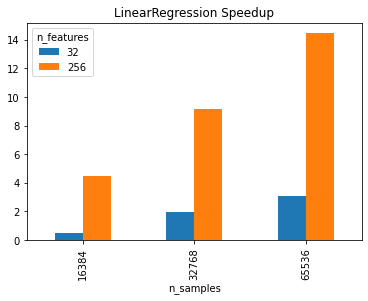

In [35]:
chart_single_algo_speedup(df, "LinearRegression")

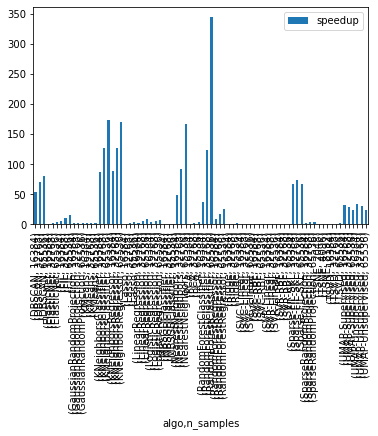

In [36]:
chart_all_algo_speedup(df)

### Output Results to CSV<a id="output_csv"/>

In [37]:
df.to_csv("benchmark_results.csv")